Dataset was downloaded from <a href="https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset">Kaggle's USA Real Estate Dataset</a>

# Data exploration and cleanse

Importing the modules required for data exploration:

<ul>
    <li>numpy: for arithmatic and matrix operations</li>
    <li>pandas: for working with dataset</li>
    <li>matplotlib: to plot the graphs</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

While loading the dataset, the following options may be specified:
<ul>
    <li>nrows: limit the number of rows read from the files</li>
    <li>sep: sets the character other than comma that is used to separate the columns in the file</li>
</ul>

I.e. to read a tab-delimited instead of comma-delimited:<br>
<i>pd.read_csv('path_of_dataset', nrows=500000, sep='\t')

In [2]:
df = pd.read_csv('./dataset/realtor-data.csv')

## Dataset

<b>shape</b> is a 2D array that displays the dimensions of the dataset: <i>(number_of_instances, number_of_features)</i>

In [3]:
print("The data frame contains %d instances and %d features." % df.shape)

The data frame contains 923159 instances and 12 features.


Normally Pandas displays only enough number of columns to fit within the display; Setting the <b>max_columns</b> option overrides this behaviour. Later on, it may be reverted back to default setting by using <b>pd.reset_option('display.max_columns')</b>

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


<b>describe()</b> returns statistics about numeric features.

In [5]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,9.230880e+05,791456.000000,807967.000000,649536.000000,922954.000000,6.253160e+05
mean,8.841225e+05,3.330352,2.488164,17.075888,6590.061523,2.141644e+03
std,2.623745e+06,2.070402,1.940057,962.322866,3818.208203,3.035327e+03
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,2.690000e+05,2.000000,1.000000,0.110000,2919.000000,1.130000e+03
50%,4.750000e+05,3.000000,2.000000,0.290000,7004.000000,1.651000e+03
75%,8.399000e+05,4.000000,3.000000,1.150000,10001.000000,2.499000e+03
max,8.750000e+08,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06


## Features

### Exploration

<b>columns</b> stores the list of the feature names.
<br>
<b>index</b> displays information about the index features.
<br>
<b>info()</b> lists the features and their respective data types.
<br>
<b>dtypes</b> is a 2D array that is almost the same as info(), except that it trims the list of features when exceeding some maximum count.


In [6]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=923159, step=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [9]:
df.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

### Values/Frequencies

In [10]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
       'Wyoming', 'Maine', 'Georgia', 'Pennsylvania', 'West Virginia',
       'Delaware'], dtype=object)

In [11]:
df['status'].value_counts()

for_sale          921528
ready_to_build      1631
Name: status, dtype: int64

### Stats/Plots

In [12]:
df.bed.describe()

count    791456.000000
mean          3.330352
std           2.070402
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         123.000000
Name: bed, dtype: float64

In [13]:
decimal_beds = df[df['bed'].apply(
    lambda x: (not np.isnan(x)) and (not x.is_integer())
)].shape[0]

print("There are %d instances with non-integer number of beds" % decimal_beds)

There are 0 instances with non-integer number of beds


array([[<AxesSubplot:title={'center':'bed'}>,
        <AxesSubplot:title={'center':'bath'}>]], dtype=object)

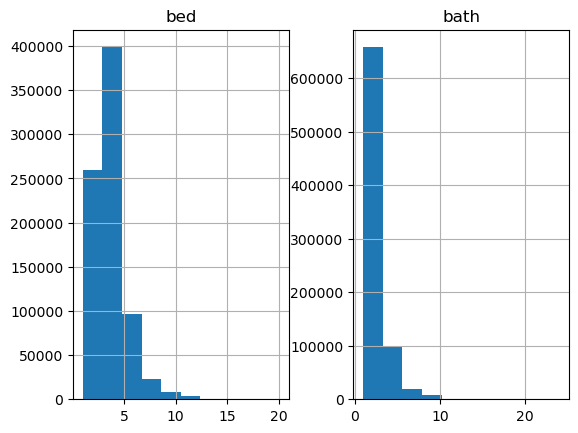

In [14]:
df[df['bed'] <= 20].hist(['bed', 'bath'])

<AxesSubplot:xlabel='index', ylabel='bath'>

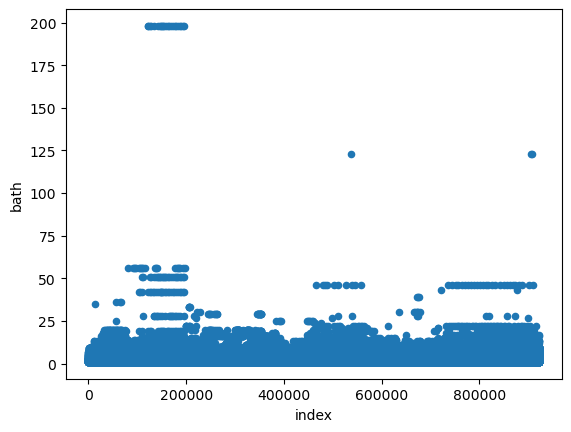

In [15]:
df.reset_index().plot(kind='scatter', x='index', y='bath')

<AxesSubplot:xlabel='bed'>

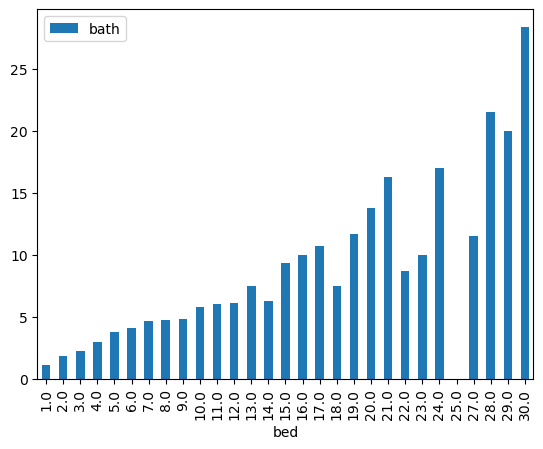

In [16]:
df[df['bed'] <= 30].groupby('bed').mean().plot(kind='bar', y='bath')

[Text(0.5, 0, 'No of bedrooms'), Text(0, 0.5, 'mean price (Million USD)')]

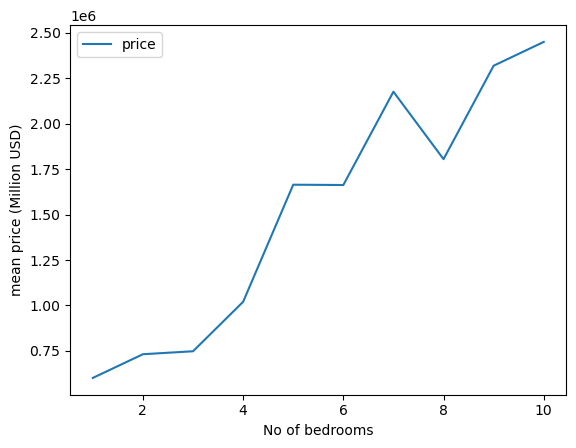

In [17]:
df[df['bed'] <= 10].sort_values('bed').groupby('bed').mean().plot(kind='line', y='price').set(xlabel='No of bedrooms', ylabel='mean price (Million USD)')

### Sampling

In [18]:
df['sold_date'].sample(n=10, random_state=1)

337751    2020-03-23
876905           NaN
134932           NaN
442728    2014-08-13
697651           NaN
105694           NaN
579282    2000-06-21
197516    2006-09-29
494858    2020-02-21
522188    1986-07-18
Name: sold_date, dtype: object

### Type casting

In [19]:
df['sold_date'] = pd.to_datetime(df['sold_date'])

In [20]:
df['bed'] = pd.to_numeric(df['bed'], errors='coerce')

In [21]:
df['bath'] = df['bath'].astype('float')

In [22]:
df['status'] = df['status'].astype('category')

## Missing values

### Exploring NaNs

<b>isna().sum()</b> is used to display the total number of NaN values in each feature.

In [23]:
print(df.isna().sum())

status               0
price               71
bed             131703
bath            115192
acre_lot        273623
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64


In [24]:
df[df['price'].isna()]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
619434,ready_to_build,NaN,4.0,NaN,NaN,"141 Hartford Road, Medford, NJ, 08055",141 Hartford Road,Medford,New Jersey,8055.0,2244.0,NaT
619444,ready_to_build,NaN,3.0,NaN,NaN,"1 Naples Lane, Mount Laurel, NJ, 08054",1 Naples Lane,Mount Laurel,New Jersey,8054.0,2224.0,NaT
619445,ready_to_build,NaN,3.0,NaN,NaN,"1 Naples Lane, Mount Laurel, NJ, 08054",1 Naples Lane,Mount Laurel,New Jersey,8054.0,2270.0,NaT
620249,ready_to_build,NaN,2.0,NaN,NaN,"4300 Bridgeboro Road, Moorestown, NJ, 08057",4300 Bridgeboro Road,Moorestown,New Jersey,8057.0,1748.0,NaT
620325,ready_to_build,NaN,2.0,NaN,NaN,"4300 Bridgeboro Road, Moorestown, NJ, 08057",4300 Bridgeboro Road,Moorestown,New Jersey,8057.0,1865.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
685698,ready_to_build,NaN,5.0,NaN,NaN,"1219 Pimpernell Path, Middletown, DE, 19709",1219 Pimpernell Path,Middletown,Delaware,19709.0,2511.0,NaT
685699,ready_to_build,NaN,5.0,NaN,NaN,"1219 Pimpernell Path, Middletown, DE, 19709",1219 Pimpernell Path,Middletown,Delaware,19709.0,2814.0,NaT
701728,ready_to_build,NaN,3.0,NaN,NaN,"Levis Drive & S Martin Ave, Mount Holly, NJ, 0...",Levis Drive & S Martin Ave,Mount Holly,New Jersey,8060.0,2208.0,NaT
702663,ready_to_build,NaN,4.0,NaN,NaN,"141 Hartford Road, Medford, NJ, 08055",141 Hartford Road,Medford,New Jersey,8055.0,2244.0,NaT


We can cross several features with each other to deduce patterns. I.e. the below code (empty resultset) tells us that all the houses with missing 'price' feature are missing 'sold_date' as well.

In [25]:
df[(~ df['sold_date'].isna()) & (df['price'].isna())]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date


### Dealing with NaNs

<b>Approach 1:</b>
Dropping the corresponding instances:
<br>
<i>df.dropna(axis='index', how='any|all', thresh=min_number_of_non_na_in_row, inplace=True|False)</i>

The code below drops any instance with 4 or more NaNs.

In [26]:
df_na_dropped = df.dropna(axis='index', thresh=8, inplace=False)
print("Total instances being dropped: %d" % (df.shape[0] - df_na_dropped.shape[0]))

Total instances being dropped: 2238


<b>Approach 2:</b>
Dropping the corresponding features:
<br>
<i>df.dropna(axis='columns', how='any|all', thresh=min_number_of_non_na_in_feature, subset=['feature1', 'feature2', ...], inplace=True|False)</i>

The code below drops any feature half of which's values are NaNs

In [27]:
df_na_dropped = df.dropna(axis='columns', thresh=(df.shape[0] // 2), inplace=False)
print("Features being dropped: %s" % list(set(df.columns) - set(df_na_dropped.columns)))

Features being dropped: ['sold_date']


<b>Approach 3:</b>
Fill with a default value

In [28]:
df['price_na_replaced'] = df['price'] = df['price'].fillna(0)

df['price_na_replaced'].isna().sum()

0

<b>Approach 4:</b>
Replacing with the mean value

In [29]:
df['bed_na_replaced'] = df['bed'].fillna(df['bed'].mean())

df['bed_na_replaced'].isna().sum()

0

<b>Approach 5:</b>
Replacing with mode

In [30]:
df['bath_na_replaced'] = df['bath'].fillna(df['bath'].mode()[0])

df['bath_na_replaced'].isna().sum()

0

<b>Approach 6:</b>
Putting in the value of previous/next instance, <i>bfill</i> and <i>ffill</i> respectively.
<br>
Note: for consecutive NaNs it might leave some as is; so, this approach is best combined with another.

In [31]:
df['sold_date_na_replaced'] = df['sold_date'].fillna(method='bfill')
df['sold_date_na_replaced'] = df['sold_date_na_replaced'].fillna(method='ffill')

df['sold_date_na_replaced'].isna().sum()

0

## Duplicate instances

In [32]:
df.duplicated().sum()

538490

In [33]:
df[df.duplicated()].sort_values(['zip_code', 'full_address', 'sold_date']).head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_na_replaced,bed_na_replaced,bath_na_replaced,sold_date_na_replaced
1336,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT,80000.0,4.0,2.0,2020-02-28
1588,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT,80000.0,4.0,2.0,2020-02-28
1663,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT,80000.0,4.0,2.0,2020-02-28
1839,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT,80000.0,4.0,2.0,2020-02-28
2052,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT,80000.0,4.0,2.0,2020-02-28


Dropping the duplicate instances, while keeping only the <i>first</i> or <i>last</i> one.

In [34]:
df_duplicates_dropped = df.drop_duplicates(keep = "first")

df_duplicates_dropped.duplicated().sum()

0

## Outliers

In [37]:
df['bed'].describe()

count    791456.000000
mean          3.330352
std           2.070402
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         123.000000
Name: bed, dtype: float64

### Using quantiles
We can use quantiles to remove lower and/or upper outliers

In [38]:
q_low = df["bed"].quantile(0.01)
q_hi  = df["bed"].quantile(0.99)

df_filtered = df[(df["bed"] < q_hi) & (df["bed"] > q_low)]

print("Total outliers dropped: %d" % (df.shape[0] - df_filtered.shape[0]))

df_filtered['bed'].describe()

Total outliers dropped: 225905


count    697254.000000
mean          3.488779
std           1.409872
min           2.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           9.000000
Name: bed, dtype: float64

### Using z-score

In [39]:
df_filtered = df[np.abs(df['bed']-df['bed'].mean()) <= (3*df['bed'].std())]

print("Total outliers dropped: %d" % (df.shape[0] - df_filtered.shape[0]))

df_filtered['bed'].describe()

Total outliers dropped: 140307


count    782852.000000
mean          3.216653
std           1.540652
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           9.000000
Name: bed, dtype: float64